In [1]:
import sys
import json
import requests
import numpy as np
import pandas as pd
from swgoh_data_track import *
from datetime import datetime, timedelta
from swgoh_api import *
from swgoh_db import *
import sqlite3
from sqlite3 import Error
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Please note that the program expects to find the file ../CONFIGURE.json with the following format:
{
    "swgoh.help": {
        "username": "user",
        "password": "pass",
        "grant_type": "password",
        "client_id": "abc",
        "client_secret": "123"
    }
}


In [2]:
mecq1=get_guild_members(CONFIG,928428534)

{'token_type': 'bearer', 'access_token': '2edbaf94cd06188e58166213ab003342c4ffc8d6', 'expires_in': 3600}
Logged in successfully


In [3]:
mecq=get_guild_full(CONFIG, 928428534)

{'token_type': 'bearer', 'access_token': '241b1f619a0be1ed58d579b1826806d90f866d8c', 'expires_in': 3600}
Logged in successfully


In [4]:
mecq

[{'id': 'G2512223038',
  'name': 'LØFÂ MÊCQ',
  'desc': 'Tight knit, helpful, chatty, group of friends that is kicking ass and taking names in swgoh!',
  'members': 50,
  'status': 2,
  'required': 85,
  'bannerColor': 'gold_purple',
  'bannerLogo': 'guild_icon_havoc',
  'message': 'TW... have you checked your mods?',
  'gp': 211182661,
  'raid': {'aat': 'HEROIC80', 'rancor': 'HEROIC80', 'sith_raid': 'HEROIC85'},
  'roster': [{'id': 'P1758854433',
    'guildMemberLevel': 2,
    'name': 'JAYBIRD',
    'level': 85,
    'allyCode': 695141142,
    'gp': 4231887,
    'gpChar': 2473905,
    'gpShip': 1757982,
    'updated': 1559249385955},
   {'id': 'P1096721753',
    'guildMemberLevel': 3,
    'name': 'Guybrush Treepwood',
    'level': 85,
    'allyCode': 816994263,
    'gp': 4380098,
    'gpChar': 2666279,
    'gpShip': 1713819,
    'updated': 1559249385932},
   {'id': 'P143034089',
    'guildMemberLevel': 3,
    'name': 'Lossberg',
    'level': 85,
    'allyCode': 928428534,
    'gp': 336

In [5]:
df=pd.DataFrame(data=mecq[0]['roster'])

In [6]:
df['gpChar'] = df['gpChar']/1000000
df['gpShip'] = df['gpShip']/1000000

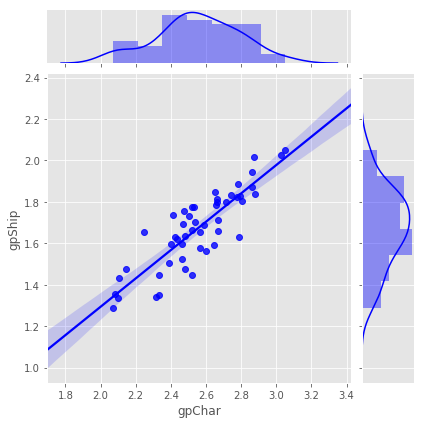

In [7]:
sns.jointplot(data=df,x="gpChar",y="gpShip",kind='reg',color="blue")

In [8]:
project= {'language': 'eng_us','allycodes': 928428534,'structure':False,
          'project':{'roster':
                     {'defId':1,'nameKey':1,'gear':1,'gp':1,'level':1,'rarity':1,"combatType":1}}}
one_player=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
one_player

{'token_type': 'bearer', 'access_token': '6ba9e3805e2ffd52753b21974b3982d9524f40db', 'expires_in': 3600}
Logged in successfully


[{'roster': [{'defId': 'MAGMATROOPER',
    'nameKey': 'Magmatrooper',
    'rarity': 2,
    'level': 38,
    'gear': 3,
    'combatType': 1,
    'gp': 1076},
   {'defId': 'HERMITYODA',
    'nameKey': 'Hermit Yoda',
    'rarity': 7,
    'level': 85,
    'gear': 12,
    'combatType': 1,
    'gp': 20376},
   {'defId': 'ZEBS3',
    'nameKey': 'Garazeb "Zeb" Orrelios',
    'rarity': 7,
    'level': 85,
    'gear': 12,
    'combatType': 1,
    'gp': 20799},
   {'defId': 'BARRISSOFFEE',
    'nameKey': 'Barriss Offee',
    'rarity': 7,
    'level': 82,
    'gear': 8,
    'combatType': 1,
    'gp': 11408},
   {'defId': 'CT210408',
    'nameKey': 'CT-21-0408 "Echo"',
    'rarity': 7,
    'level': 72,
    'gear': 5,
    'combatType': 1,
    'gp': 7695},
   {'defId': 'B1BATTLEDROIDV2',
    'nameKey': 'B1 Battle Droid',
    'rarity': 4,
    'level': 1,
    'gear': 1,
    'combatType': 1,
    'gp': 1014},
   {'defId': 'COLONELSTARCK',
    'nameKey': 'Colonel Starck',
    'rarity': 7,
    'level': 85,

In [9]:
df_player=pd.DataFrame(one_player[0]['roster'])
#df_player.drop(["equipped",'skills','xp','combatType','crew','mods','id','skills'],axis=1,inplace=True)
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
combatType    204 non-null int64
defId         204 non-null object
gear          204 non-null int64
gp            204 non-null int64
level         204 non-null int64
nameKey       204 non-null object
rarity        204 non-null int64
dtypes: int64(5), object(2)
memory usage: 11.2+ KB


In [10]:
df_player.apply(lambda x: x*2).head()

,combatType,defId,gear,gp,level,nameKey,rarity
0,2,MAGMATROOPERMAGMATROOPER,6,2152,76,MagmatrooperMagmatrooper,4
1,2,HERMITYODAHERMITYODA,24,40752,170,Hermit YodaHermit Yoda,14
2,2,ZEBS3ZEBS3,24,41598,170,"Garazeb ""Zeb"" OrreliosGarazeb ""Zeb"" Orrelios",14
3,2,BARRISSOFFEEBARRISSOFFEE,16,22816,164,Barriss OffeeBarriss Offee,14
4,2,CT210408CT210408,10,15390,144,"CT-21-0408 ""Echo""CT-21-0408 ""Echo""",14


In [11]:
df.head()

,allyCode,gp,gpChar,gpShip,guildMemberLevel,id,level,name,updated
0,695141142,4231887,2.473905,1.757982,2,P1758854433,85,JAYBIRD,1559249385955
1,816994263,4380098,2.666279,1.713819,3,P1096721753,85,Guybrush Treepwood,1559249385932
2,928428534,3360746,2.071760,1.289049,3,P143034089,85,Lossberg,1559249379200
3,788297363,4600390,2.776213,1.824177,3,P1366690209,85,dankatomi,1559249385691
4,545755536,3956677,2.483004,1.473673,2,P3092542104,85,Mitth'raw'nuruodo,1559249385700


In [12]:
for index,row in df.reset_index().iterrows():
 #   df.loc[index,"new_col"]=row['gp']/2
    project= {'language': 'eng_us','allycodes':row['allyCode'],'project':{'roster':
                     {'defId':1,'gear':1,'gp':1,"combatType":1}}}
    api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP) 

{'token_type': 'bearer', 'access_token': '6390785bef9b6330fcaf9c3fae057b0aae1fc394', 'expires_in': 3600}
Logged in successfully
{'token_type': 'bearer', 'access_token': 'ea1348364ca832de45451e4010a7293a2b593afa', 'expires_in': 3600}
Logged in successfully
{'token_type': 'bearer', 'access_token': 'b08bdad39a07f37cfd81cd6f8f3742ede438f56a', 'expires_in': 3600}
Logged in successfully
{'token_type': 'bearer', 'access_token': 'e44a3f833fe5ca066534a25a7d50a19a9c87dd39', 'expires_in': 3600}
Logged in successfully


KeyboardInterrupt: 

In [ ]:
for index,row in df.iterrows():
 #   df.loc[index,"new_col"]=row['gp']/2
    if index <=21: pass
    project= {'language': 'eng_us','allycodes':row['allyCode'],'project':{'roster':
                     {'defId':1,'gear':1,'gp':1,"combatType":1}}}
    one_payer=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
    df_player=pd.DataFrame(one_payer[0]['roster'])
    df.loc[index,"gp11+"]=df_player[(df_player['combatType']==1) & (df_player['gear']>=11)]["gp"].sum()  

In [ ]:
project= {'language': 'eng_us','allycodes':722561985,'project':{'roster':
                     {'defId':1,'nameKey':1,'gear':1,'gp':1,'level':1,'rarity':1,"combatType":1}}}
one_payer=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)
df_player2=pd.DataFrame(one_payer[0]['roster'])
#df_player.drop(["equipped",'skills','xp','combatType','crew','mods','id','skills'],axis=1,inplace=True)
df_player2.info()

In [ ]:
df_player2[(df_player2['combatType']==1) & (df_player2['gear']<=10)]["gp"].sum()/1000000

In [ ]:
df.set_index('allyCode',inplace=True)

In [ ]:
df.loc[928977297]

In [ ]:
df.sort_values(by='gp11+',axis=0,ascending=False)[['name','gp','gpChar','gp11+']]

In [ ]:
sns.jointplot(data=df,x="gpChar",y="gp11+")

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x="gpChar",y="gp",hue="gp11+",palette="seismic")

In [126]:
df.sort_values(by='gp11+',axis=0,ascending=False)[['name','gp','gpChar','gp11+']].to_excel('gp11plus.xlsx')

In [34]:
project= {'language': 'eng_us','allycodes':df["allyCode"].tolist(),'project':{"allyCode":1,'roster':
                     {'defId':1,'gear':1,'gp':1,"combatType":1}}}
one_payer=api_call(CONFIG, project, '%s/swgoh/players' % SWGOH_HELP)

{'token_type': 'bearer', 'access_token': '72d6eabed71208855fccb727fc1e76fc18c51c40', 'expires_in': 3600}
Logged in successfully


In [76]:
for player in one_payer:
    df_player=pd.DataFrame(player['roster'])
    df.loc[player['allyCode'],'gp11+']=df_player[(df_player['combatType']==1) & (df_player['gear']>=11)]["gp"].sum()/df.loc[player['allyCode'],'gpChar']

In [ ]:
project= {'language': 'eng_us','allycodes': 928428534,'structure':True,'project':{ 'id':0,'roster':0}}
api_call(CONFIG, project, '%s/swgoh/guilds' % SWGOH_HELP)

In [ ]:
project= {'language': 'eng_us','allycodes': 928428534,'project':{'id':1}}
api_call(CONFIG, project, '%s/swgoh/guilds' % SWGOH_HELP)

In [ ]:
db2='G2512223038'+".db"

In [ ]:
    database = db2
    conn = db_create_connection(database)
    isValid=False

In [ ]:
guild_update_time=user_input_date()

In [ ]:
with conn:
        current_time=players_gp_snapshot (conn)
        
        conn.commit()
        compare_all_guild_gp(conn,guild_update_time,current_time,True)

In [ ]:
all_guild_player=db_query_all_players_id_name(conn)

In [ ]:
all_guild_player
time1_id=db_get_timestamp(conn,guild_update_time)
time1_id
time_now=db_get_timestamp(conn,current_time)

In [ ]:
pl=db_query_gp_date(conn,all_guild_player[0][0],time1_id[1])
pl

In [ ]:
d={"GP characters":[pl[0]],"GP ships":[pl[1]],"Ally Code":[pl[2]],"Name":[pl[3]]}

In [ ]:
df=pd.DataFrame(data=d)

In [ ]:
all_guild_player

In [ ]:
rows_list=[]
for player in all_guild_player:
    #print(player[0])
    pl=db_query_gp_date(conn,player[0],time_now[1])
    #print(pl)
    if (pl==None): continue
    dict1 = {}
    dict1.update({"GP characters":pl[0],"GP ships":pl[1],"Ally Code":pl[2],"Name":pl[3]})
    rows_list.append(dict1)

df = pd.DataFrame(rows_list)

In [ ]:
df_sorted=df.sort_values(by="GP characters")
df_sorted.plot.bar(x="Name",y="GP characters")

In [ ]:
db_get_all_times(conn)

In [ ]:
all_guild_player


In [ ]:
rows_list=[]
pid=1
all_times=db_get_all_times(conn)
for one_time in all_times:
    #print(player[0])
    pl=db_query_gp_date(conn,pid,one_time[0])
 #   print(pl)
    if (pl==None): continue
    dict1 = {}
    dict1.update({"GP characters":pl[0],"GP ships":pl[1],"Date":one_time[1]})
    rows_list.append(dict1)
df_time = pd.DataFrame(rows_list)
#print(df_time)
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.title(all_guild_player[pid-1][1])
plt.plot(df_time["Date"],df_time['GP characters'],linestyle='-',marker='x')

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.scatter(df_time["Date"],df_time['GP characters'])